In [1]:
import pandas as pd

file_path = r'C:\Users\Manal\Downloads\DL_FIRE_M-C61_634551\fire_archive_M-C61_634551.csv'

df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (4866204, 15)


latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   48.4610    38.7808       311.1   1.9    1.3  2024-01-01        35   
1  -15.2828   132.3189       377.9   1.6    1.2  2024-01-01        39   
2  -15.0487   132.6429       327.9   1.5    1.2  2024-01-01        39   
3  -15.2938   132.3170       324.8   1.6    1.2  2024-01-01        39   
4  -15.0463   132.6290       330.5   1.5    1.2  2024-01-01        39   

  satellite instrument  confidence  version  bright_t31    frp daynight  type  
0      Aqua      MODIS          82    61.03       271.2   40.5        N     2  
1     Terra      MODIS          94    61.03       295.9  258.2        D     0  
2     Terra      MODIS          69    61.03       294.0   26.7        D     0  
3     Terra      MODIS          51    61.03       291.5   16.3        D     0  
4     Terra      MODIS          77    61.03       294.8   32.7        D     0

In [2]:
df.info()

missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4866204 entries, 0 to 4866203
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  int64  
 10  version     float64
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 556.9+ MB

Missing values per column:
 latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64


In [3]:
df.describe()

latitude     longitude    brightness          scan         track  \
count  4.866204e+06  4.866204e+06  4.866204e+06  4.866204e+06  4.866204e+06   
mean   4.551616e+00  1.235429e+01  3.256077e+02  1.567897e+00  1.198683e+00   
std    2.353193e+01  6.567742e+01  1.747237e+01  7.724767e-01  2.380633e-01   
min   -7.498340e+01 -1.788230e+02  3.000000e+02  1.000000e+00  1.000000e+00   
25%   -1.277660e+01 -4.923720e+01  3.152000e+02  1.100000e+00  1.000000e+00   
50%   -3.755600e+00  2.113960e+01  3.224000e+02  1.200000e+00  1.100000e+00   
75%    1.341220e+01  3.560200e+01  3.316000e+02  1.800000e+00  1.300000e+00   
max    8.562080e+01  1.796477e+02  5.100000e+02  4.800000e+00  2.000000e+00   

           acq_time    confidence     version    bright_t31           frp  \
count  4.866204e+06  4.866204e+06  4866204.00  4.866204e+06  4.866204e+06   
mean   1.161760e+03  6.708279e+01       61.03  3.005342e+02  4.240300e+01   
std    5.286347e+02  2.105241e+01        0.00  8.369543e+00  1.090580e+02   
min    0.000000e+00  0.000000e+00       61.03  2.644000e+02  0.000000e+00   
25%    7.530000e+02  5.400000e+01       61.03  2.954000e+02  1.080000e+01   
50%    1.232000e+03  6.900000e+01       61.03  3.009000e+02  1.930000e+01   
75%    1.430000e+03  8.200000e+01       61.03  3.059000e+02  3.950000e+01   
max    2.359000e+03  1.000000e+02       61.03  4.001000e+02  1.349030e+04   

               type  
count  4.866204e+06  
mean   8.928006e-02  
std    4.248024e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    3.000000e+00

In [4]:
print("Satellites:", df['satellite'].unique())
print("Instruments:", df['instrument'].unique())
print("Day/Night:", df['daynight'].unique())
print("Fire Types:", df['type'].unique())

Satellites: ['Aqua' 'Terra']
Instruments: ['MODIS']
Day/Night: ['N' 'D']
Fire Types: [2 0 3 1]


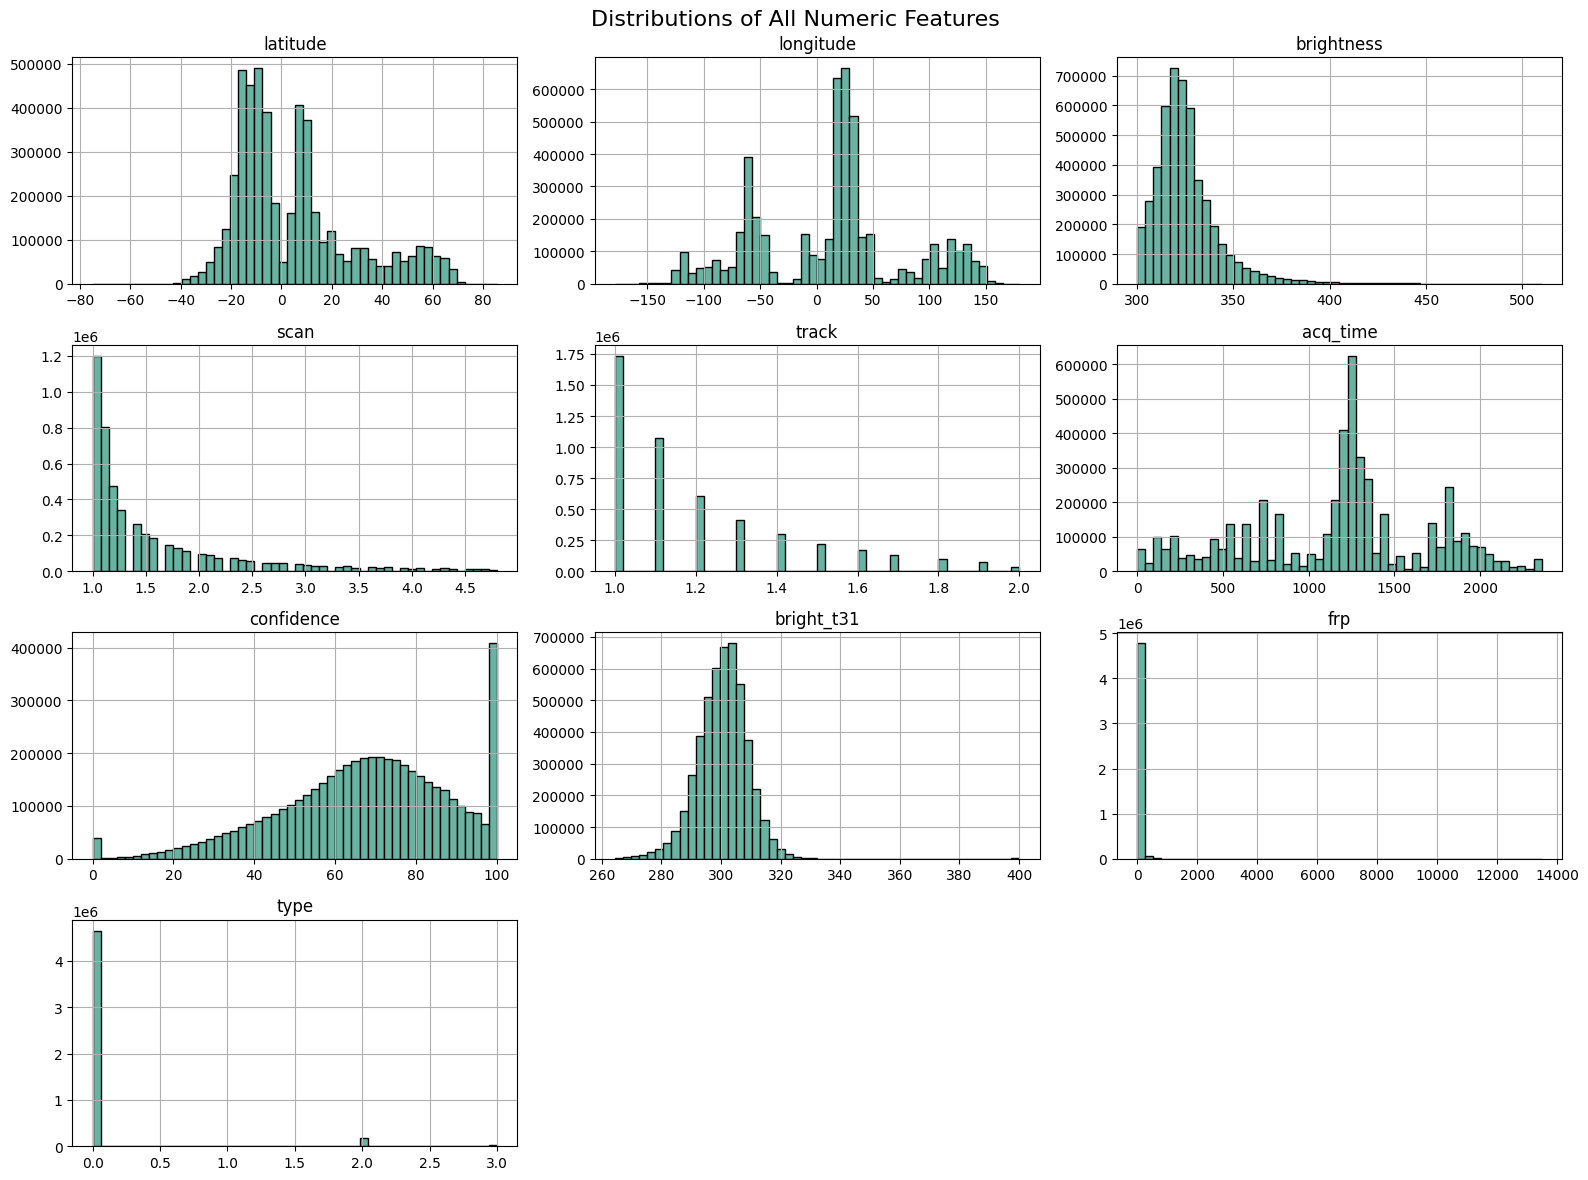

In [5]:
import matplotlib.pyplot as plt

num_cols = ['latitude', 'longitude', 'brightness', 'scan', 'track',
            'acq_time', 'confidence', 'bright_t31', 'frp', 'type']

# Skip 'version' since it's constant (61.03)
df[num_cols].hist(bins=50, figsize=(16, 12), color="#69b3a2", edgecolor="black")
plt.suptitle("Distributions of All Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

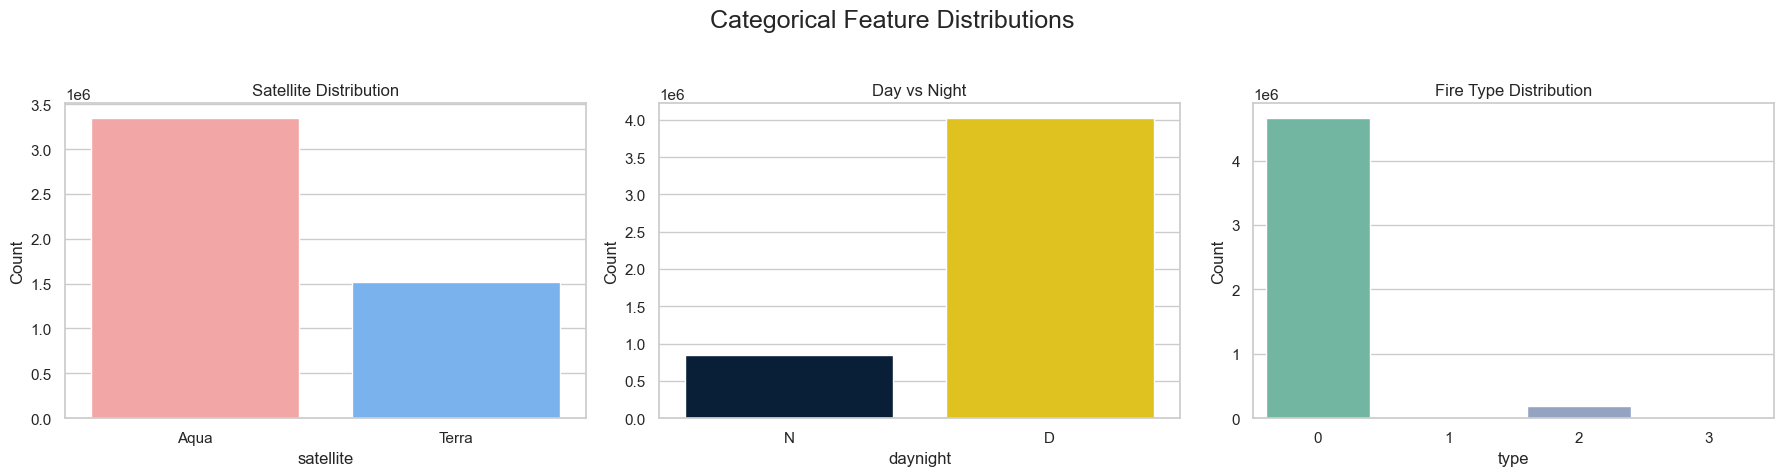

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Categorical Feature Distributions", fontsize=18)

sns.countplot(x='satellite', data=df, ax=axes[0], 
              hue='satellite', palette=['#FF9999', '#66B2FF'], legend=False)
axes[0].set_title("Satellite Distribution")
axes[0].set_ylabel("Count")

sns.countplot(x='daynight', data=df, ax=axes[1], 
              hue='daynight', palette={'D': '#FFD700', 'N': '#001f3f'}, legend=False)
axes[1].set_title("Day vs Night")
axes[1].set_ylabel("Count")

sns.countplot(x='type', data=df, ax=axes[2], 
              hue='type', palette='Set2', legend=False)
axes[2].set_title("Fire Type Distribution")
axes[2].set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


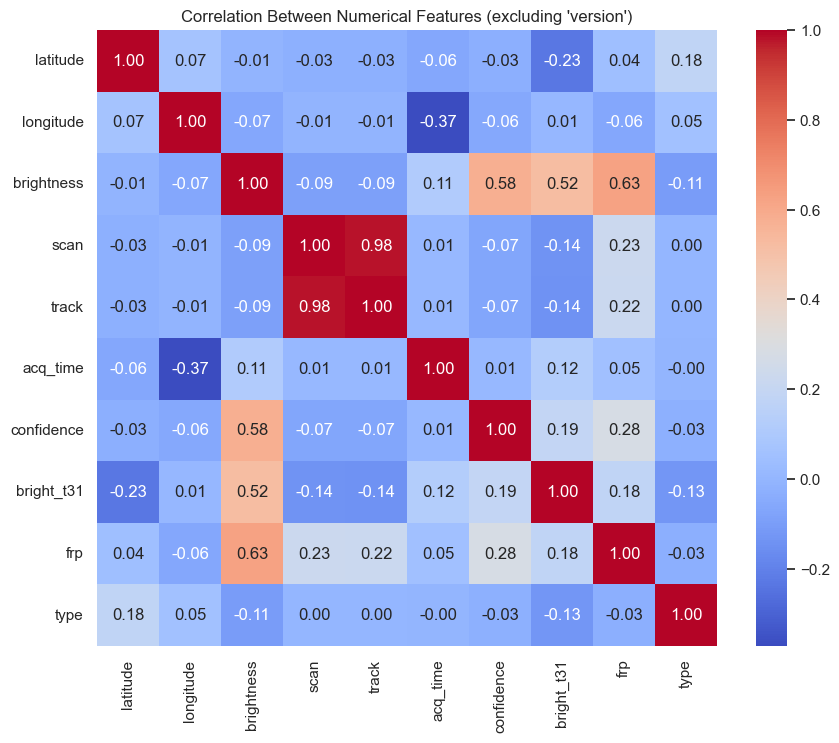

In [7]:
# Drop the 'version' column
corr_df = df.drop(columns=['version'], errors='ignore')

corr_matrix = corr_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Features (excluding 'version')")
plt.show()

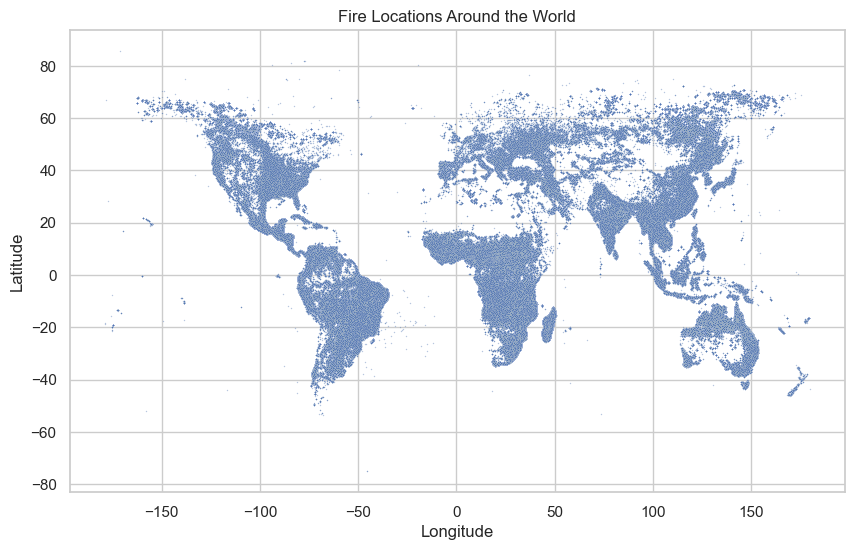

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.4, s=1)
plt.title("Fire Locations Around the World")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

C:\Users\Manal\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


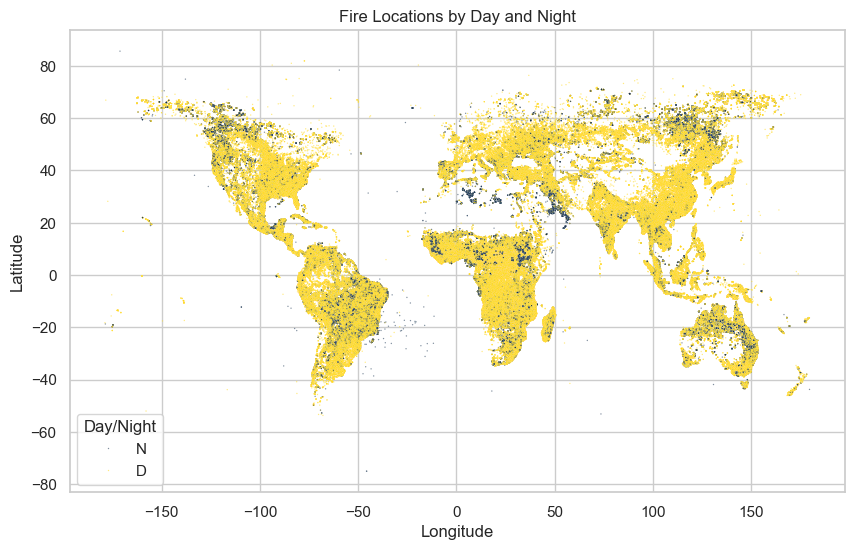

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='daynight',
    alpha=0.5,
    s=1,
    palette={'D': '#FFD700', 'N': '#001f3f'}  # Day = Yellow, Night = Dark Blue
)
plt.title("Fire Locations by Day and Night")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Day/Night")
plt.grid(True)
plt.show()

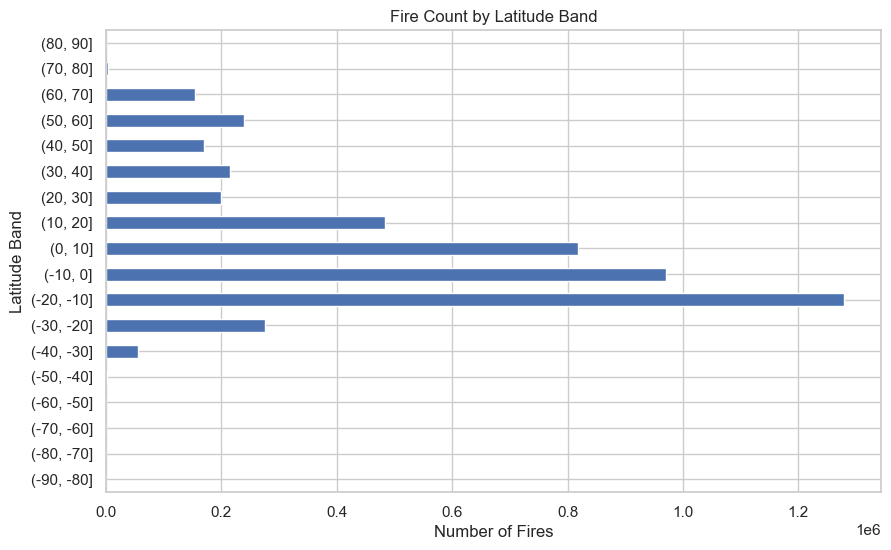

In [10]:
df['lat_band'] = pd.cut(df['latitude'], bins=range(-90, 91, 10))  # every 10 degrees
top_lat_bands = df['lat_band'].value_counts().sort_index()

top_lat_bands.plot(kind='barh', figsize=(10, 6))
plt.title("Fire Count by Latitude Band")
plt.xlabel("Number of Fires")
plt.ylabel("Latitude Band")
plt.grid(True)
plt.show()

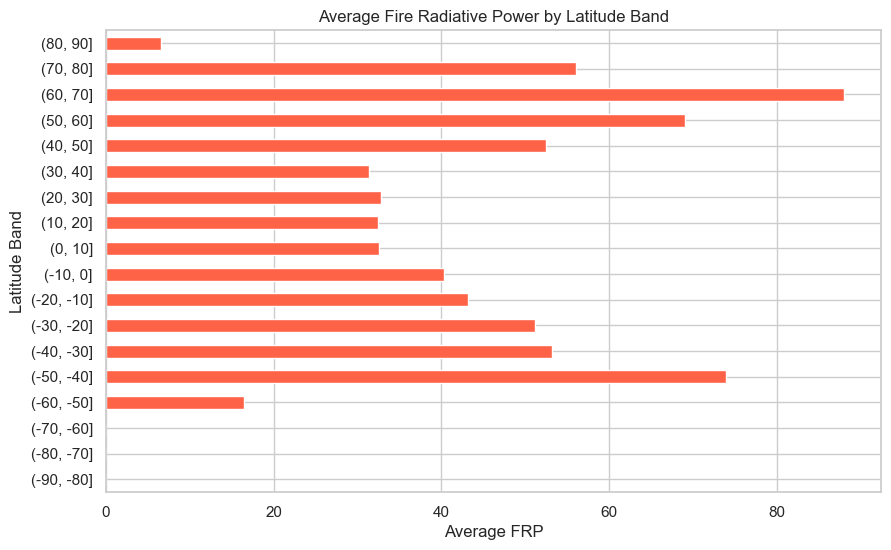

In [11]:
df['lat_band'] = pd.cut(df['latitude'], bins=range(-90, 91, 10))

avg_frp = df.groupby('lat_band', observed=False)['frp'].mean()

avg_frp.plot(kind='barh', color='tomato', figsize=(10, 6))
plt.title("Average Fire Radiative Power by Latitude Band")
plt.xlabel("Average FRP")
plt.ylabel("Latitude Band")
plt.grid(True)
plt.show()

In [12]:
import geopandas as gpd
from shapely.geometry import Point

# give the path to .shp file
world = gpd.read_file(r"C:\Users\Manal\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")

# Create geometry column for fire locations
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Spatial join with countries
geo_df = gpd.sjoin(geo_df, world[['geometry', 'NAME']], how='left', predicate='within')

# Rename column to 'country'
geo_df.rename(columns={'NAME': 'country'}, inplace=True)

In [13]:
geo_df[['latitude', 'longitude', 'country']].head(10)

latitude  longitude    country
0   48.4610    38.7808    Ukraine
1  -15.2828   132.3189  Australia
2  -15.0487   132.6429  Australia
3  -15.2938   132.3170  Australia
4  -15.0463   132.6290  Australia
5  -15.3853   134.8454  Australia
6  -15.3837   134.8351  Australia
7  -15.3803   134.8522  Australia
8  -15.2853   132.3335  Australia
9  -15.3662   134.8230  Australia

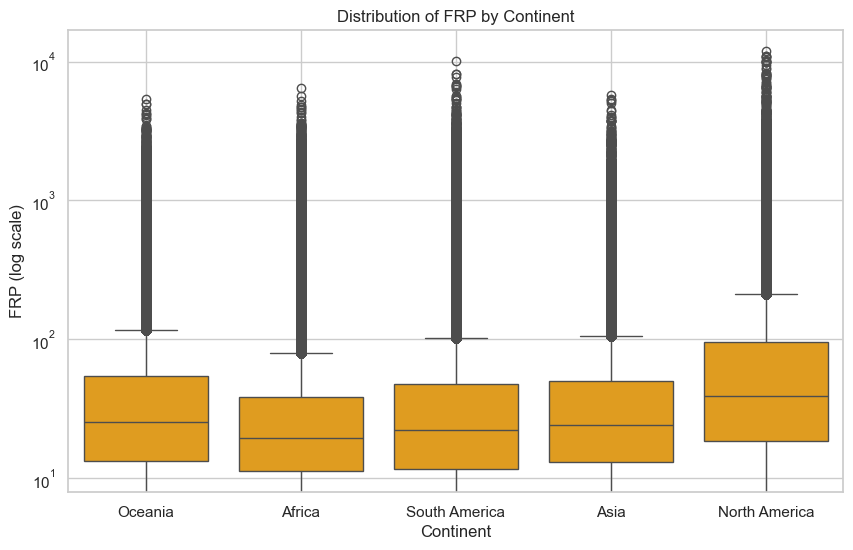

In [14]:
continent_map = {
    'Brazil': 'South America', 'Angola': 'Africa', 'Dem. Rep. Congo': 'Africa',
    'Australia': 'Oceania', 'Russia': 'Asia', 'Bolivia': 'South America',
    'Zambia': 'Africa', 'Mozambique': 'Africa', 'S. Sudan': 'Africa', 'Canada': 'North America'
}

geo_df['continent'] = geo_df['country'].map(continent_map)

plt.figure(figsize=(10,6))
sns.boxplot(x='continent', y='frp', data=geo_df, color='orange')  # Removed deprecated `palette`
plt.yscale('log')  # Because FRP has high variance
plt.title("Distribution of FRP by Continent")
plt.xlabel("Continent")
plt.ylabel("FRP (log scale)")
plt.grid(True)
plt.show()

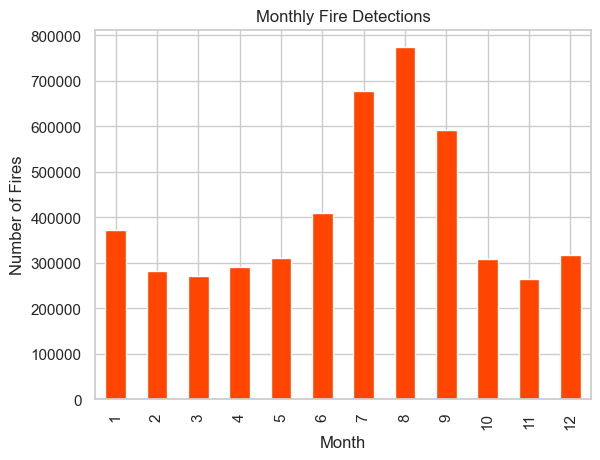

In [15]:
df['month'] = pd.to_datetime(df['acq_date']).dt.month
monthly_counts = df['month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', color='orangered')
plt.title("Monthly Fire Detections")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.grid(True)
plt.show()

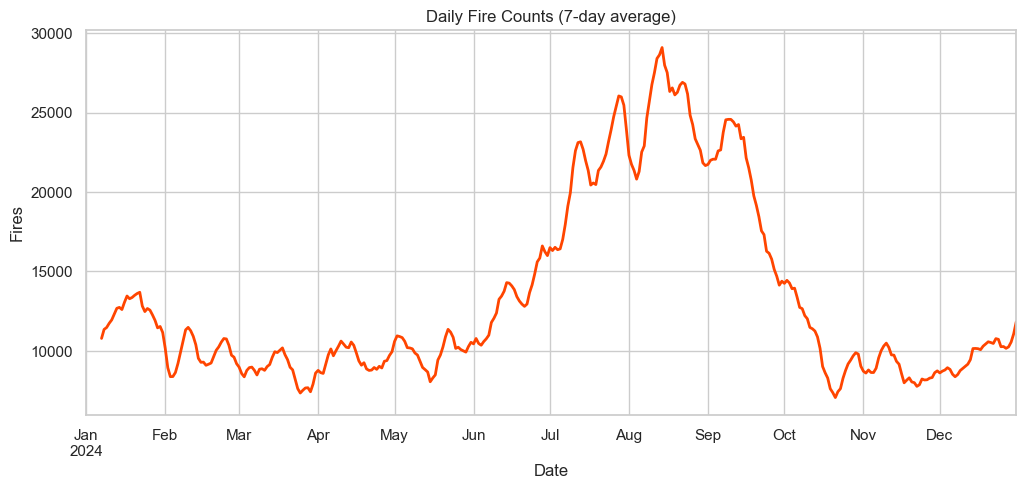

In [16]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
daily_counts = df.groupby('acq_date').size()

plt.figure(figsize=(12,5))
daily_counts.rolling(7).mean().plot(color='orangered', linewidth=2)  # 7-day moving average
plt.title("Daily Fire Counts (7-day average)")
plt.xlabel("Date")
plt.ylabel("Fires")
plt.grid(True)
plt.show()

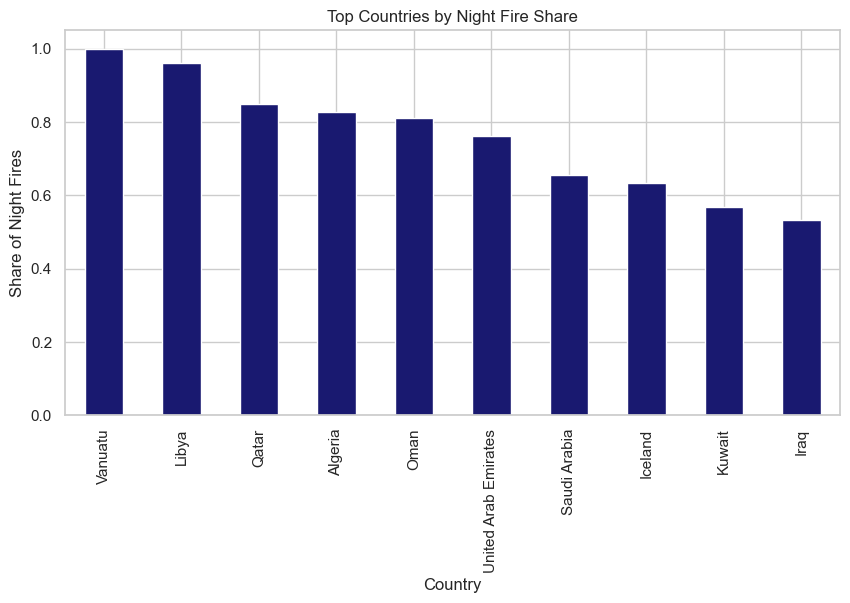

In [17]:
night_day_ratio = geo_df.groupby(['country', 'daynight']).size().unstack().fillna(0)
night_day_ratio['night_share'] = night_day_ratio['N'] / (night_day_ratio['N'] + night_day_ratio['D'])

night_day_ratio['night_share'].sort_values(ascending=False).head(10).plot(
    kind='bar', color='midnightblue', figsize=(10,5)
)
plt.title("Top Countries by Night Fire Share")
plt.ylabel("Share of Night Fires")
plt.xlabel("Country")
plt.grid(True)
plt.show()

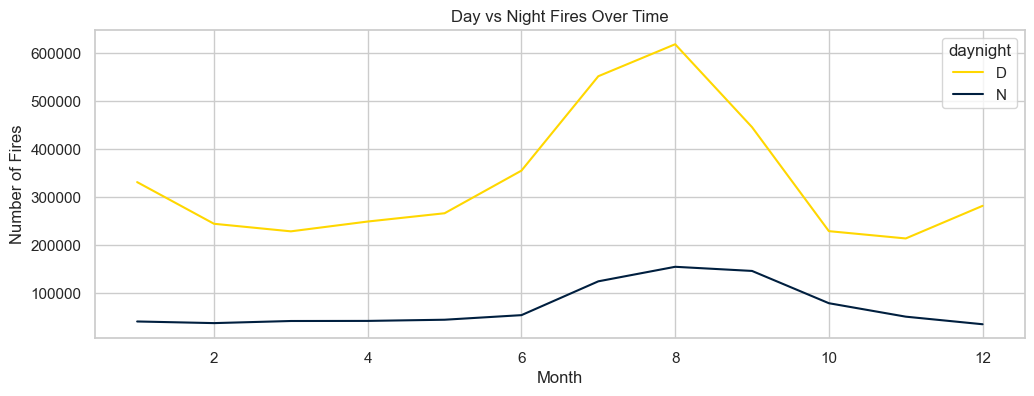

In [18]:
daynight_monthly = df.groupby(['month', 'daynight']).size().unstack()
daynight_monthly.plot(kind='line', figsize=(12, 4), color=['#FFD700', '#001f3f'])
plt.title("Day vs Night Fires Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.grid(True)
plt.show()

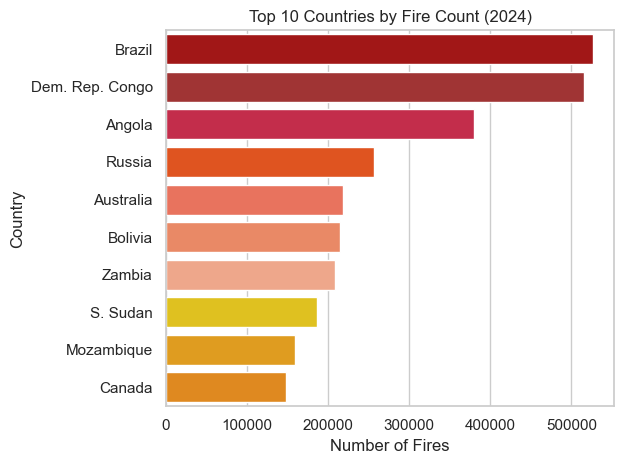

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

top_countries = geo_df['country'].value_counts().head(10)

sns.barplot(
    y=top_countries.index,
    x=top_countries.values,
    palette=sns.color_palette(['#B80000', '#B22222', '#DC143C', '#FF4500', '#FF6347',
                               '#FF7F50', '#FFA07A', '#FFD700', '#FFA500', '#FF8C00']),
    orient='h'
)

plt.title("Top 10 Countries by Fire Count (2024)")
plt.xlabel("Number of Fires")
plt.ylabel("Country")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


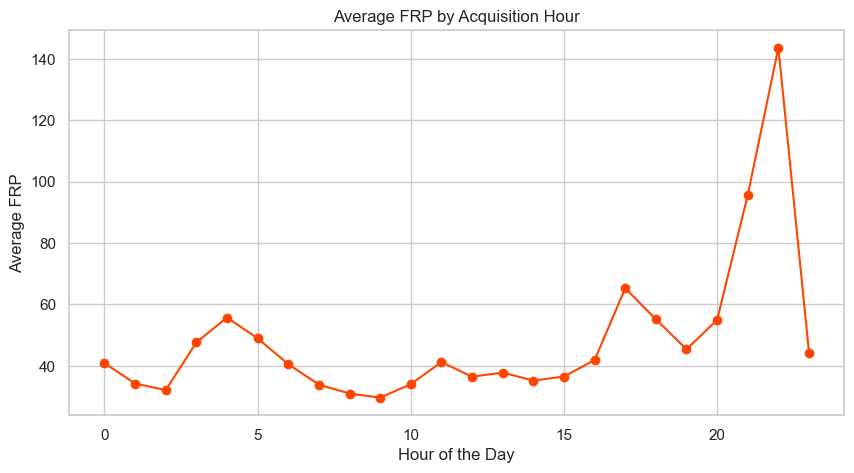

In [20]:
df['acq_hour'] = df['acq_time'] // 100  # example: 1330 → 13
frp_by_hour = df.groupby('acq_hour')['frp'].mean()

plt.figure(figsize=(10, 5))
frp_by_hour.plot(kind='line', marker='o', color='orangered')
plt.title("Average FRP by Acquisition Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average FRP")
plt.grid(True)
plt.show()

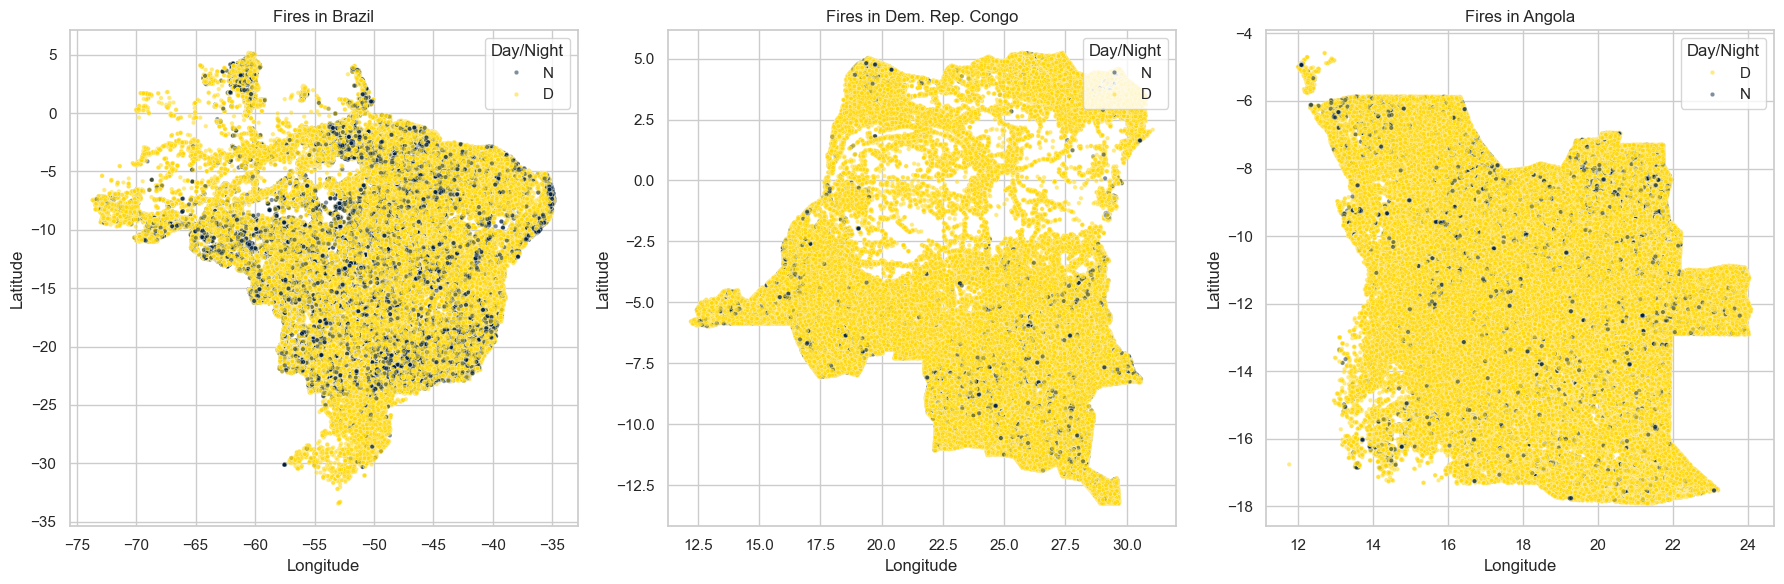

In [21]:
top_countries = geo_df['country'].value_counts().head(3).index

fixed_palette = {'D': '#FFD700', 'N': '#001f3f'}  

# Tracer les feux pour chaque top pays
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, country in enumerate(top_countries):
    subset = geo_df[geo_df['country'] == country]
    sns.scatterplot(
        data=subset,
        x='longitude',
        y='latitude',
        hue='daynight',
        palette=fixed_palette,
        ax=axes[i],
        s=10,
        alpha=0.5
    )
    axes[i].set_title(f'Fires in {country}')
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")
    axes[i].legend(title="Day/Night", loc='upper right')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

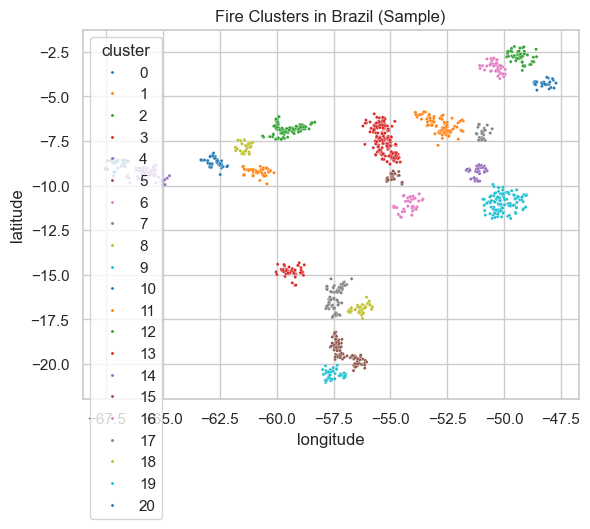

In [22]:
from sklearn.cluster import DBSCAN
import numpy as np

# Use the merged DataFrame that has 'country'
brazil_df = geo_df[geo_df['country'] == 'Brazil'][['latitude', 'longitude']].dropna().sample(n=5000, random_state=42)

coords = brazil_df.to_numpy()
db = DBSCAN(eps=0.5, min_samples=30).fit(coords)

brazil_df['cluster'] = db.labels_

sns.scatterplot(data=brazil_df[brazil_df['cluster'] != -1],
                x='longitude', y='latitude', hue='cluster', palette='tab10', s=5)
plt.title("Fire Clusters in Brazil (Sample)")
plt.grid(True)
plt.show()


In [23]:
brazil_df['cluster'] = brazil_df['cluster'].astype(int)
top_clusters = brazil_df['cluster'].value_counts().head(5)
print(top_clusters)

cluster
-1    3604
 3     194
 9     117
 1     108
 2     106
Name: count, dtype: int64


In [24]:
centroids = brazil_df[brazil_df['cluster'] != -1].groupby('cluster')[['latitude', 'longitude']].mean()
print(centroids)

          latitude  longitude
cluster                      
0        -8.778855 -66.998458
1        -6.625158 -52.808182
2        -6.834441 -59.463564
3        -7.499325 -55.252716
4        -9.297543 -65.650930
5       -19.346484 -56.965521
6       -11.119204 -54.222371
7       -16.295800 -57.415680
8       -16.908986 -56.321426
9       -10.954967 -50.010714
10       -8.700769 -62.708930
11       -9.221927 -60.865055
12       -2.761554 -49.284358
13      -14.822198 -59.353047
14       -9.234017 -51.172289
15       -9.534297 -54.887427
16       -3.361819 -50.391244
17       -7.050800 -50.977566
18       -7.857561 -61.426488
19      -20.577124 -57.504695
20       -4.273458 -48.293003


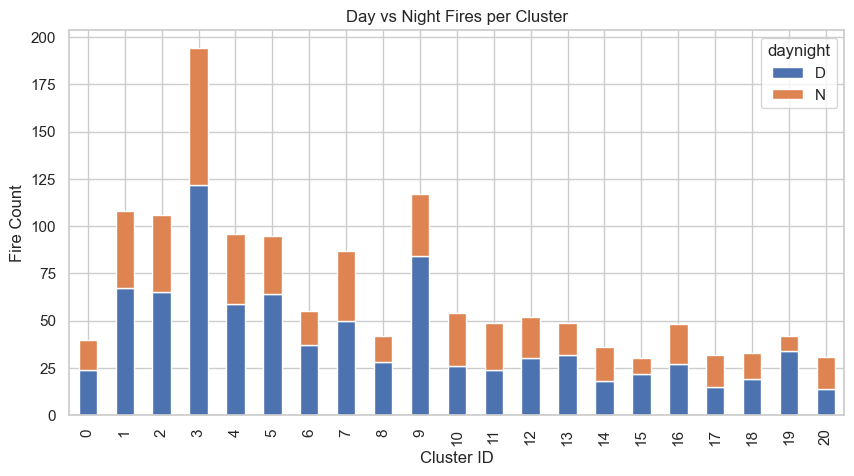

In [25]:
brazil_df['daynight'] = geo_df.loc[brazil_df.index, 'daynight']
day_night_by_cluster = brazil_df[brazil_df['cluster'] != -1].groupby(['cluster', 'daynight']).size().unstack().fillna(0)
day_night_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Day vs Night Fires per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Fire Count")
plt.grid(True)
plt.show()

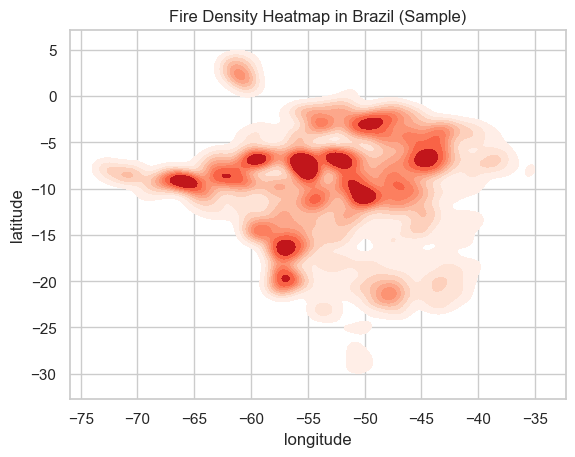

In [26]:
sns.kdeplot(data=brazil_df, x='longitude', y='latitude', fill=True, cmap="Reds", bw_adjust=0.5)
plt.title("Fire Density Heatmap in Brazil (Sample)")
plt.grid(True)
plt.show()

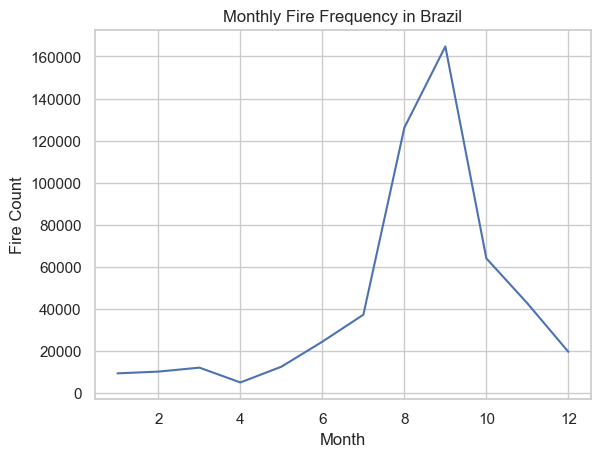

In [27]:
geo_df['acq_date'] = pd.to_datetime(geo_df['acq_date'])  # if not already
geo_df[geo_df['country'] == 'Brazil'].groupby(geo_df['acq_date'].dt.month)['latitude'].count().plot()
plt.title("Monthly Fire Frequency in Brazil")
plt.xlabel("Month")
plt.ylabel("Fire Count")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Fires by Time of Day')

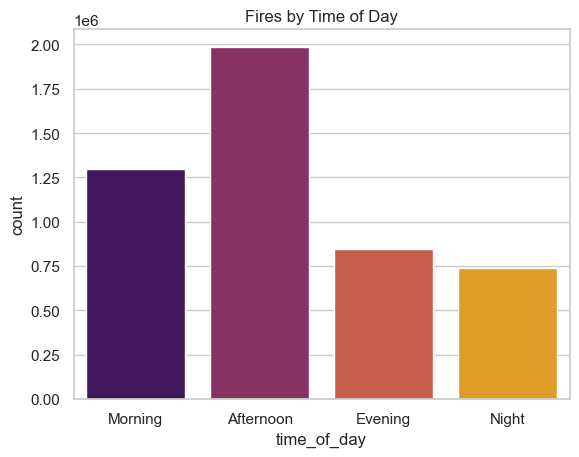

In [28]:
def time_of_day(hour):
    if 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'

df['hour'] = df['acq_time'] // 100
df['time_of_day'] = df['hour'].apply(time_of_day)

sns.countplot(data=df, x='time_of_day', order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='inferno')
plt.title("Fires by Time of Day")

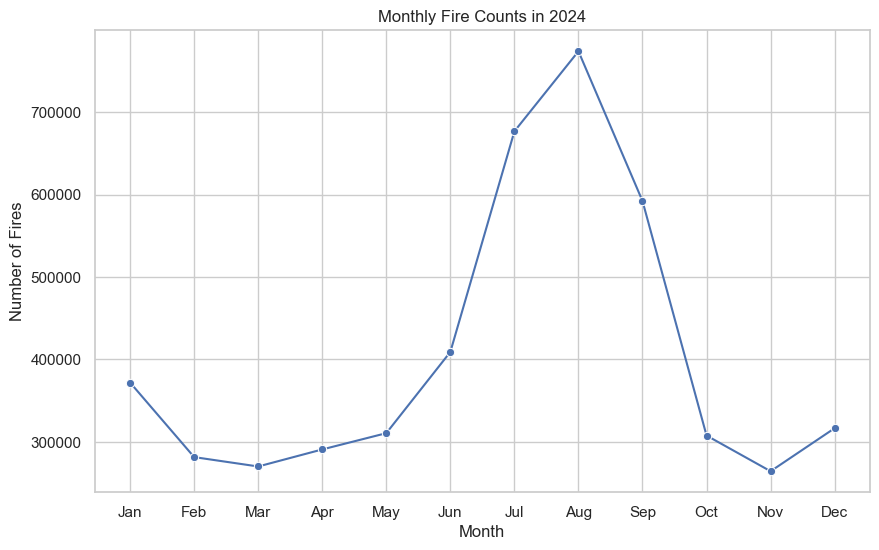

In [29]:
import calendar  

df['acq_date'] = pd.to_datetime(df['acq_date'])

# Filter fires for 2024
fires_2024 = df[df['acq_date'].dt.year == 2024].copy()

# Group by month
fires_2024['month'] = fires_2024['acq_date'].dt.month
monthly_counts = fires_2024.groupby('month').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Show Jan to Dec
plt.title("Monthly Fire Counts in 2024")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.grid(True)
plt.show()

In [30]:
import folium
from folium.plugins import HeatMap

sample = df[['latitude', 'longitude']].dropna().sample(n=5000, random_state=42)

m = folium.Map(location=[0, 0], zoom_start=2, tiles='CartoDB dark_matter')

HeatMap(data=sample[['latitude', 'longitude']].values, radius=8, blur=4).add_to(m)

m.save("fire_heatmap.html")

In [31]:
import webbrowser
webbrowser.open("fire_heatmap.html")

True

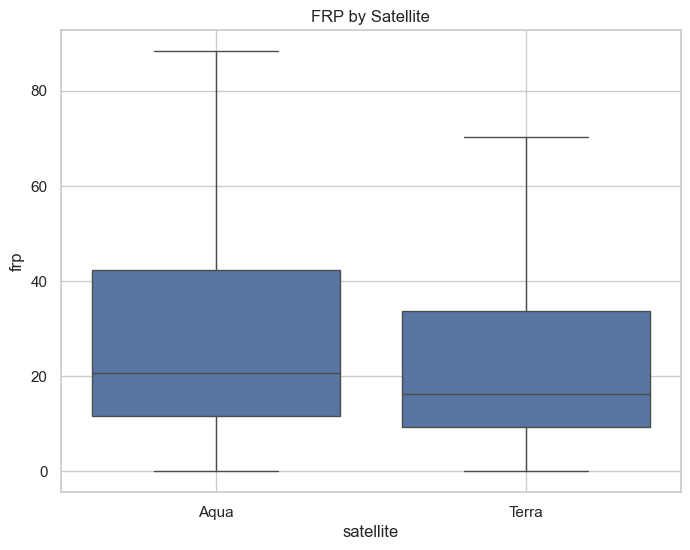

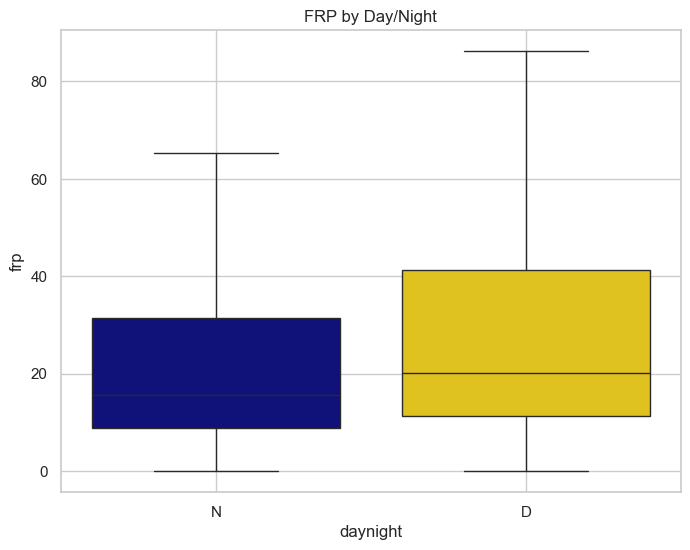

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='satellite', y='frp', data=df, showfliers=False)
plt.title("FRP by Satellite")
plt.grid(True)
plt.show()

# Day vs Night
plt.figure(figsize=(8,6))
sns.boxplot(x='daynight', y='frp', data=df, showfliers=False, palette={'D': 'gold', 'N': 'darkblue'})
plt.title("FRP by Day/Night")
plt.grid(True)
plt.show()

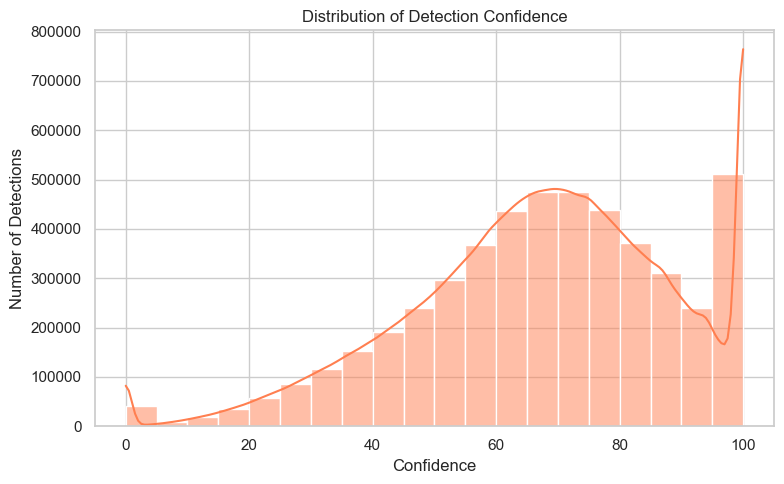

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['confidence'], bins=20, kde=True, color='coral')
plt.title("Distribution of Detection Confidence")
plt.xlabel("Confidence")
plt.ylabel("Number of Detections")
plt.grid(True)
plt.tight_layout()
plt.show()

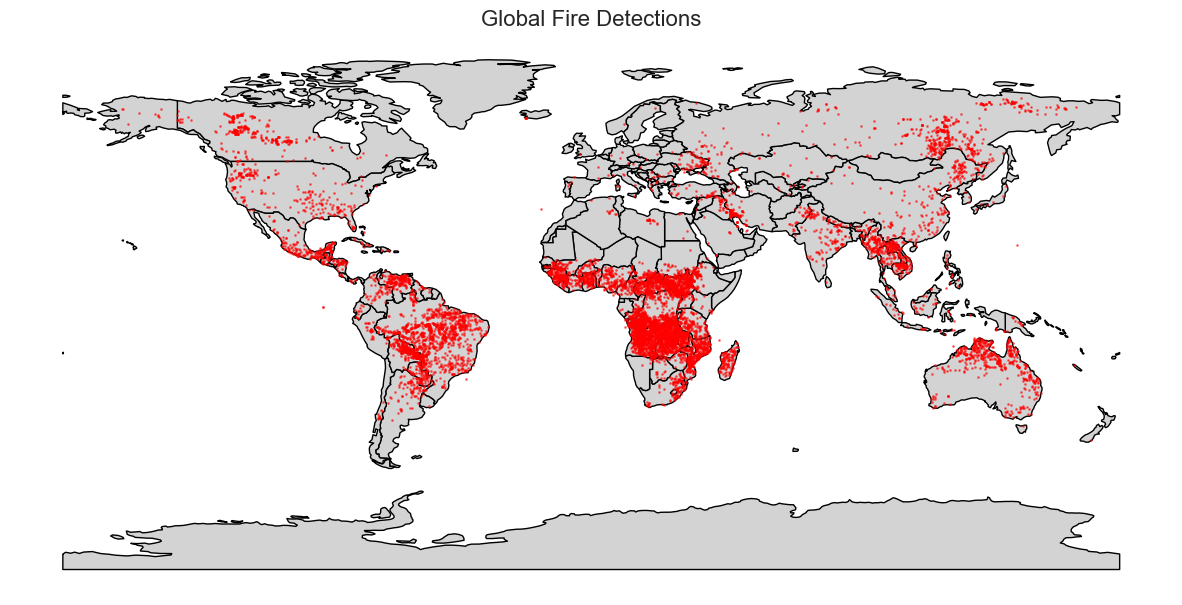

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(r"C:\Users\Manal\Downloads\ne_110m_admin_0_countries")

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.sample(10000).plot(ax=ax, markersize=1, color='red', alpha=0.5)

plt.title("Global Fire Detections", fontsize=16)
plt.axis('off')
plt.show()

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['acq_time'] = df['acq_time'].astype(str).str.zfill(4)

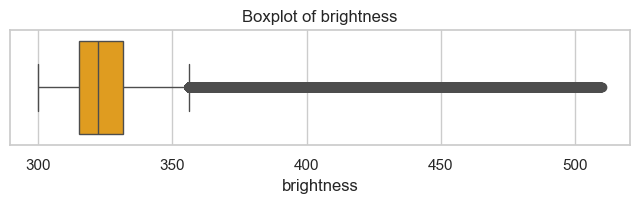

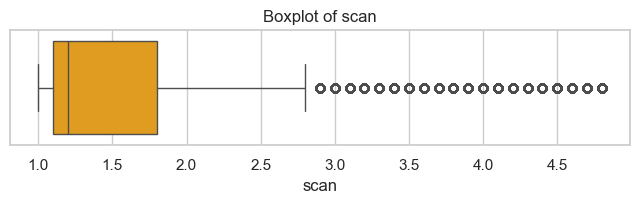

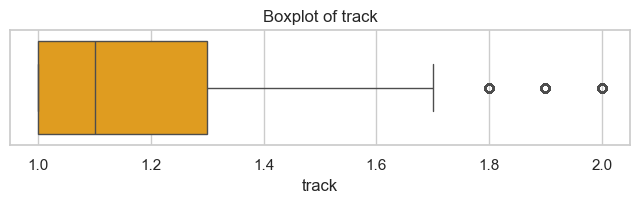

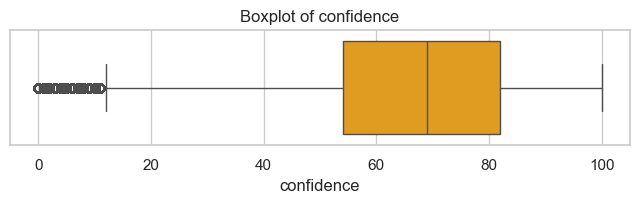

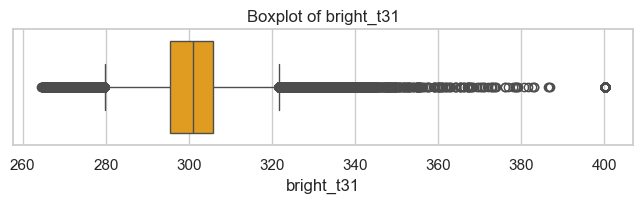

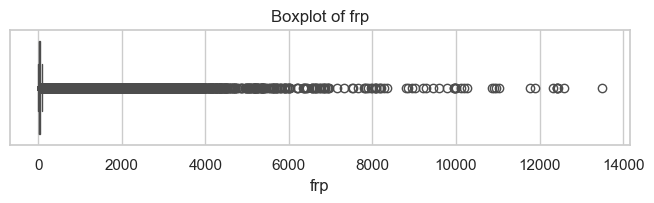

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [38]:
df.drop(columns=['version', 'type', 'acq_time'], inplace=True)

In [39]:
# Remove the old column first (to avoid memory/state issues)
if 'confidence_class' in df.columns:
    df.drop(columns=['confidence_class'], inplace=True)

# Use qcut to create 3 balanced classes based on quantiles
df['confidence_class'] = pd.qcut(df['confidence'], q=3, labels=[0, 1, 2])

In [40]:
df.head()

latitude  longitude  brightness  scan  track   acq_date satellite  \
0   48.4610    38.7808       311.1   1.9    1.3 2024-01-01      Aqua   
1  -15.2828   132.3189       377.9   1.6    1.2 2024-01-01     Terra   
2  -15.0487   132.6429       327.9   1.5    1.2 2024-01-01     Terra   
3  -15.2938   132.3170       324.8   1.6    1.2 2024-01-01     Terra   
4  -15.0463   132.6290       330.5   1.5    1.2 2024-01-01     Terra   

  instrument  confidence  bright_t31    frp daynight    lat_band  month  \
0      MODIS          82       271.2   40.5        N    (40, 50]      1   
1      MODIS          94       295.9  258.2        D  (-20, -10]      1   
2      MODIS          69       294.0   26.7        D  (-20, -10]      1   
3      MODIS          51       291.5   16.3        D  (-20, -10]      1   
4      MODIS          77       294.8   32.7        D  (-20, -10]      1   

   acq_hour  hour time_of_day confidence_class  
0         0     0       Night                2  
1         0     0       Night                2  
2         0     0       Night                1  
3         0     0       Night                0  
4         0     0       Night                1

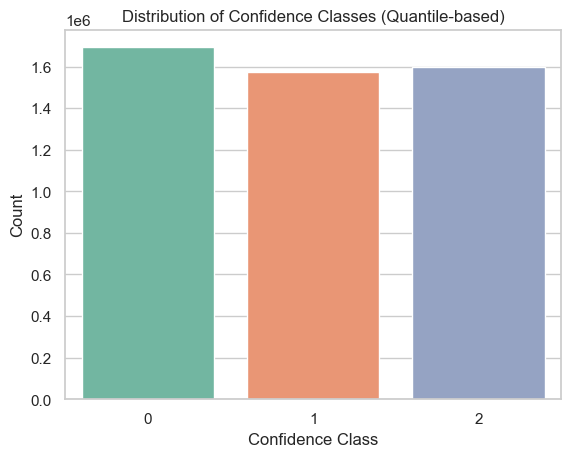

confidence_class
0    0.347853
2    0.328609
1    0.323538
Name: proportion, dtype: float64


In [41]:
sns.countplot(data=df, x='confidence_class', palette='Set2')
plt.title("Distribution of Confidence Classes (Quantile-based)")
plt.ylabel("Count")
plt.xlabel("Confidence Class")
plt.show()

print(df['confidence_class'].value_counts(normalize=True))

In [42]:
print(df.columns.tolist())

['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'satellite', 'instrument', 'confidence', 'bright_t31', 'frp', 'daynight', 'lat_band', 'month', 'acq_hour', 'hour', 'time_of_day', 'confidence_class']


In [43]:
df_model = df.drop(columns=['confidence', 'acq_date'])

In [44]:
df_model.head()

latitude  longitude  brightness  scan  track satellite instrument  \
0   48.4610    38.7808       311.1   1.9    1.3      Aqua      MODIS   
1  -15.2828   132.3189       377.9   1.6    1.2     Terra      MODIS   
2  -15.0487   132.6429       327.9   1.5    1.2     Terra      MODIS   
3  -15.2938   132.3170       324.8   1.6    1.2     Terra      MODIS   
4  -15.0463   132.6290       330.5   1.5    1.2     Terra      MODIS   

   bright_t31    frp daynight    lat_band  month  acq_hour  hour time_of_day  \
0       271.2   40.5        N    (40, 50]      1         0     0       Night   
1       295.9  258.2        D  (-20, -10]      1         0     0       Night   
2       294.0   26.7        D  (-20, -10]      1         0     0       Night   
3       291.5   16.3        D  (-20, -10]      1         0     0       Night   
4       294.8   32.7        D  (-20, -10]      1         0     0       Night   

  confidence_class  
0                2  
1                2  
2                1  
3                0  
4                1

In [45]:
df_encoded = pd.get_dummies(df_model, columns=['satellite', 'instrument', 'daynight'], drop_first=True)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df_sampled = df_encoded.sample(n=100000, random_state=42).copy()

if 'lat_band' in df_sampled.columns:
    df_sampled = df_sampled.drop(columns=['lat_band'])

if 'time_of_day' in df_sampled.columns:
    df_sampled['time_of_day'] = df_sampled['time_of_day'].astype(str)
    df_sampled = pd.get_dummies(df_sampled, columns=['time_of_day'])

X = df_sampled.drop(columns=['confidence_class'])
y = df_sampled['confidence_class']

X = X.select_dtypes(include=['number', 'bool'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=4,
    max_depth=30,
    bootstrap=True
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



✅ Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73      6971
           1       0.68      0.66      0.67      6473
           2       0.85      0.93      0.89      6556

    accuracy                           0.77     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.76      0.77      0.76     20000


✅ Confusion Matrix:
 [[4952 1624  395]
 [1526 4302  645]
 [  46  445 6065]]


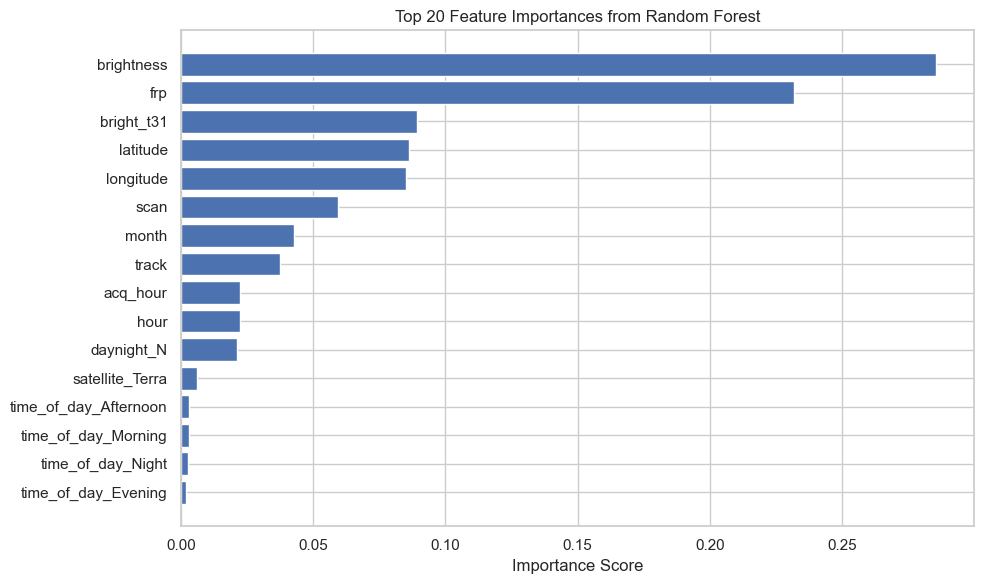

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])
plt.title("Top 20 Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("✅ Best parameters:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': False}


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      6971
           1       0.67      0.66      0.66      6473
           2       0.86      0.92      0.89      6556

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



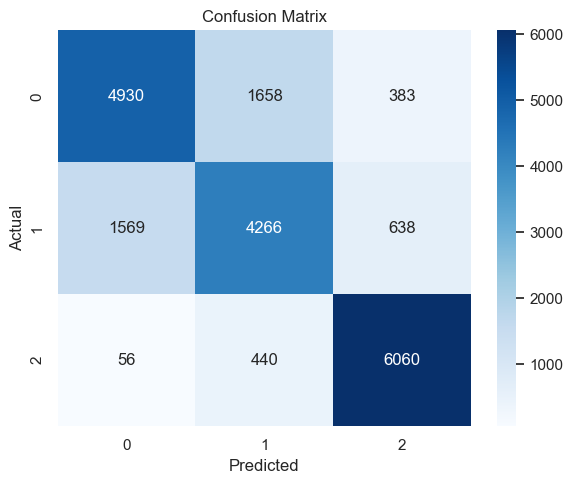

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_sampled = df_encoded.sample(n=100000, random_state=42)

X = df_sampled.drop('confidence_class', axis=1).copy()
y = df_sampled['confidence_class']

if 'lat_band' in X.columns:
    X = X.drop(columns='lat_band')

if 'time_of_day' in X.columns:
    X['time_of_day'] = X['time_of_day'].astype(str)
    X = pd.get_dummies(X, columns=['time_of_day'])

X = X.select_dtypes(include=['number', 'bool'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

best_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_depth': 30,
    'bootstrap': False
}
model = RandomForestClassifier(**best_params, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df_sampled = df_encoded.sample(n=100000, random_state=42)

X = df_sampled.drop('confidence_class', axis=1).copy()
y = df_sampled['confidence_class']

if 'lat_band' in X.columns:
    X = X.drop(columns='lat_band')

if 'time_of_day' in X.columns:
    X['time_of_day'] = X['time_of_day'].astype(str)
    X = pd.get_dummies(X, columns=['time_of_day'])

X = X.select_dtypes(include=['number', 'bool'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\Manal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:54:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      6971
           1       0.69      0.68      0.68      6473
           2       0.86      0.93      0.89      6556

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000


✅ Confusion Matrix:
 [[4989 1614  368]
 [1427 4399  647]
 [  83  381 6092]]


In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df_sampled = df_encoded.sample(n=100000, random_state=42)

X = df_sampled.drop('confidence_class', axis=1).copy()
y = df_sampled['confidence_class']

if 'lat_band' in X.columns:
    X = X.drop(columns='lat_band')

if 'time_of_day' in X.columns:
    X['time_of_day'] = X['time_of_day'].astype(str)
    X = pd.get_dummies(X, columns=['time_of_day'])

X = X.select_dtypes(include=['number', 'bool'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1,
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.5, 1.0],
    'reg_lambda': [1, 1.5, 2.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
print("✅ Best Parameters:\n", random_search.best_params_)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Manal\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:10:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters:
 {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      6971
           1       0.69      0.68      0.68      6473
           2       0.86      0.93      0.89      6556

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000


📉 Confusion Matrix:
 [[4989 1615  367]
 [1434 4387  652]
 [  70  382 6104]]


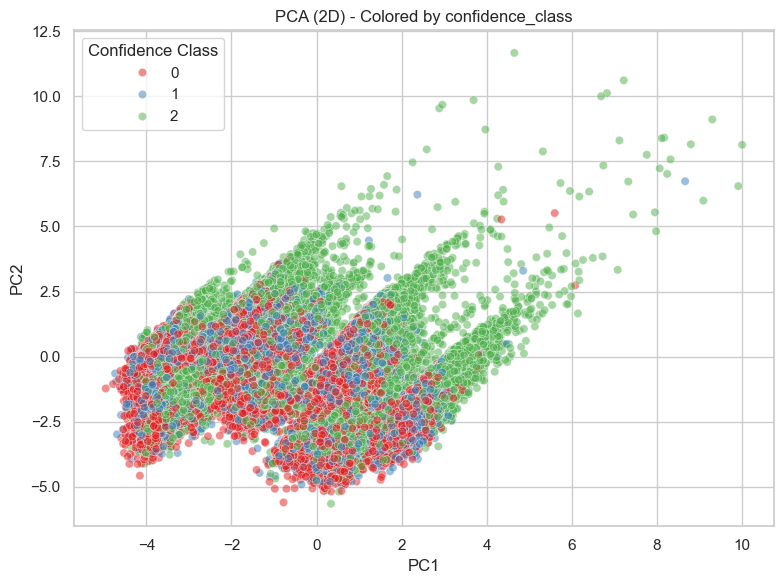

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df_sampled = df_encoded.sample(n=100000, random_state=42)

X = df_sampled.drop('confidence_class', axis=1).copy()
y = df_sampled['confidence_class']

if 'lat_band' in X.columns:
    X.drop(columns='lat_band', inplace=True)

if 'time_of_day' in X.columns:
    X['time_of_day'] = X['time_of_day'].astype(str)
    X = pd.get_dummies(X, columns=['time_of_day'])

X = X.select_dtypes(include=['number', 'bool'])

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.5)
plt.title("PCA (2D) - Colored by confidence_class")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Confidence Class')
plt.tight_layout()
plt.show()

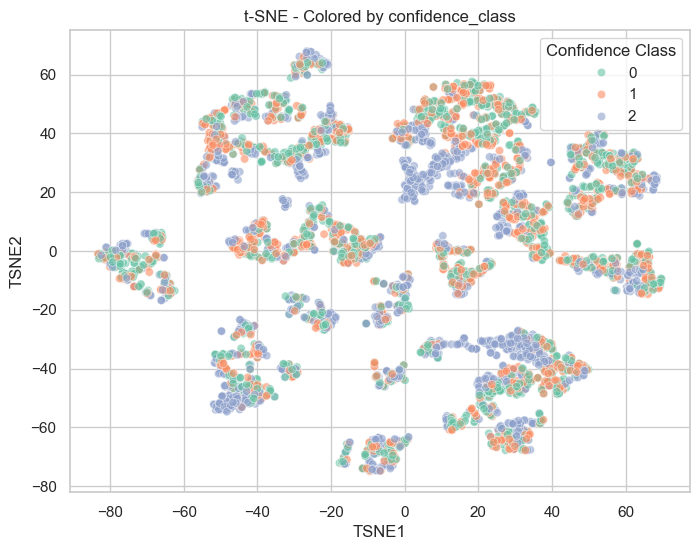

In [60]:
X_small = X_scaled[:5000]
y_small = y[:5000]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_small)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_small, palette='Set2', alpha=0.6)
plt.title("t-SNE - Colored by confidence_class")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title='Confidence Class')
plt.show()

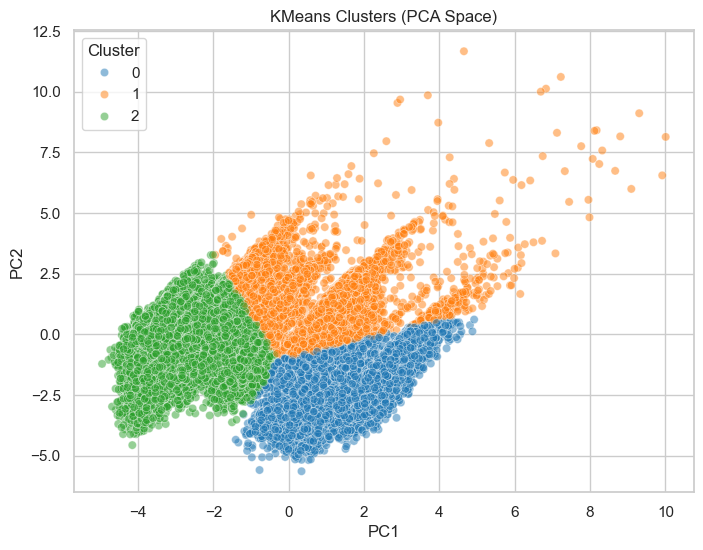

🔎 Adjusted Rand Index (PCA space vs true labels): 0.003


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pca_labels, palette='tab10', alpha=0.5)
plt.title("KMeans Clusters (PCA Space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

ari_pca = adjusted_rand_score(y, pca_labels)
print(f"🔎 Adjusted Rand Index (PCA space vs true labels): {ari_pca:.3f}")

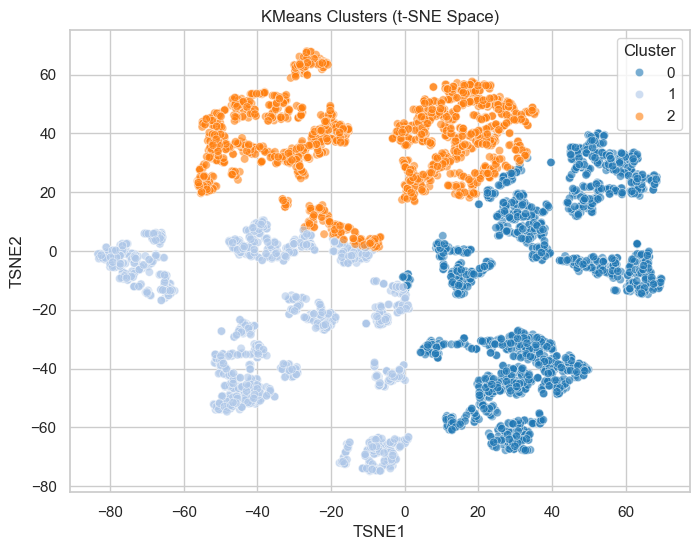

🔍 Adjusted Rand Index (t-SNE space vs true labels): 0.001


In [62]:
kmeans_tsne = KMeans(n_clusters=3, random_state=42)
tsne_labels = kmeans_tsne.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=tsne_labels, palette='tab20', alpha=0.6)
plt.title("KMeans Clusters (t-SNE Space)")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Cluster")
plt.show()

ari_tsne = adjusted_rand_score(y_small, tsne_labels)
print(f"🔍 Adjusted Rand Index (t-SNE space vs true labels): {ari_tsne:.3f}")

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca) 

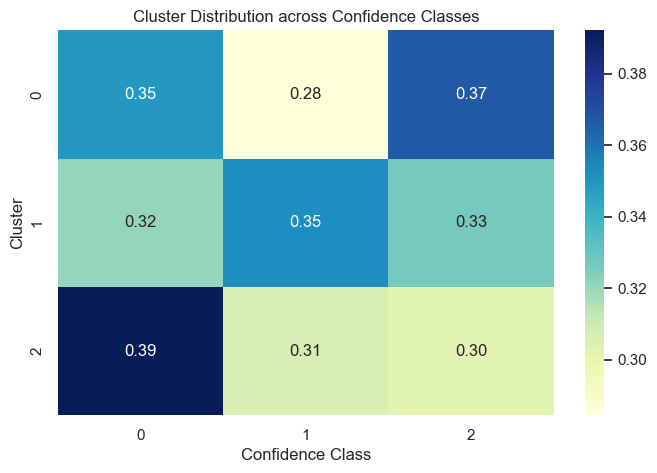

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_clusters = df_sampled.copy()
df_clusters['cluster'] = cluster_labels  

ct = pd.crosstab(df_clusters['cluster'], df_clusters['confidence_class'], normalize='index')

plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Distribution across Confidence Classes")
plt.ylabel("Cluster")
plt.xlabel("Confidence Class")
plt.show()